In [1]:
import src.models.question1 as q1

### 1. Ratings Comparison: Oscar Winners vs. Nominees

Let's start our analysis broadly by simply visualizing the distribution of average ratings bewteen oscar winners and nominees.  
For the start of our analysis, we consider a movie to be an oscar winner if a won an oscar in at least one category (and thus a nominee is one that didn't won any oscar in anny category).  
Note that we use only nominees and winner and not other movies in order to control for the general quality of the movie which could be a cofounder variable.  
For instance an amateur movie done in one month is very likely to not win an oscar and have a bad rating.  
Considering only oscar winners and nominees, we insure that the movie is already of a certain quality standart.

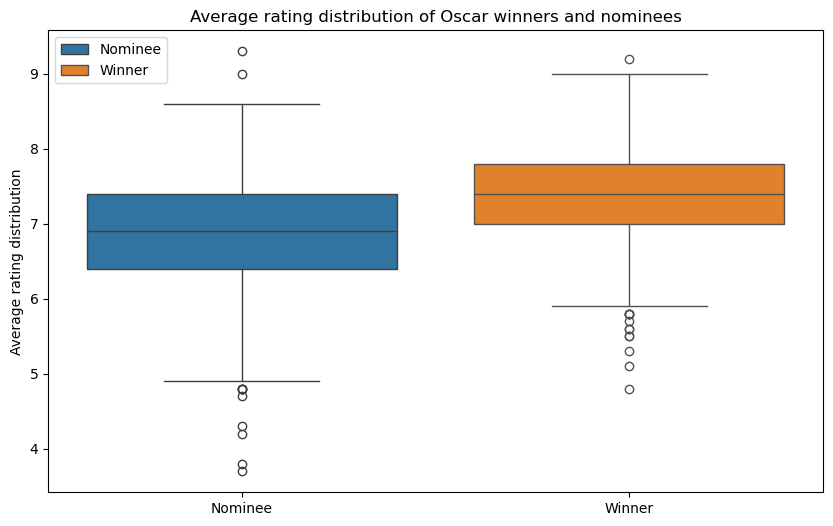

In [2]:
q1.plot_winner_vs_nominees_ratings_all_cat()

At a first look, oscar winners seem to have an higher ratings on average.  
  
However, is is yet unclear if this observation is significant or not !  
So let's perform a t-test to verify that the distribution are indeed different.

In [3]:
q1.print_ttest_winner_vs_nominees_ratings()

T-statistic:  14.984450324469712
P-value:  1.4587409398050492e-48


We observe that the p-value is very small ($<1\%$).  
Thus, we can reject the null hypothesis and initially conclude that the distribution of ratings between Oscar winners and nominees is significantly different.

Good news, the distribution are indeed significantly different.  
However, our analysis is very shalow for now and there multiple factors that we didn't take into account like: *Ratings could depend on the released year (because of nostalgia of old movies) ?* or even not all movies have the same number of votes.  
In order to refine our analysis, we must take those factor into account.

Let's look at the distribution of ratings over the years (for winner and nominees).

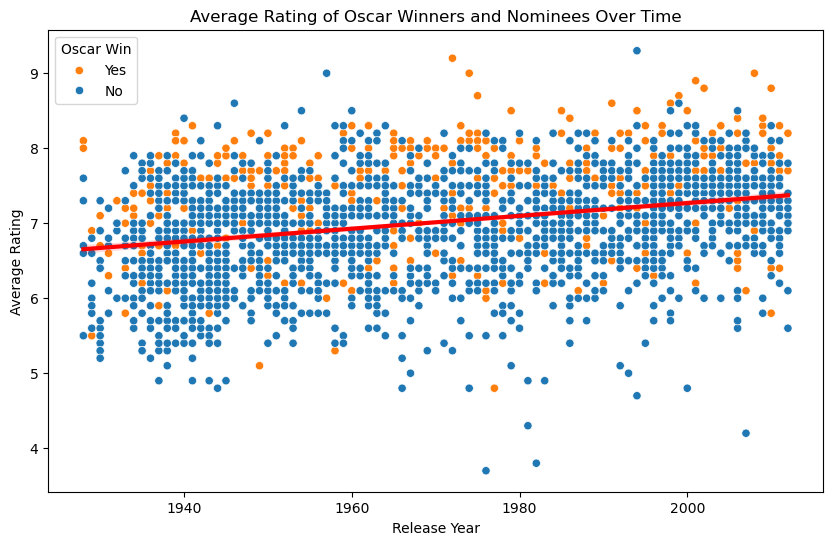

In [4]:
q1.plot_ratings_over_release_year()

We indeed see that ratings seems to naturally increase with the release year.  
Let's confirm this observation with a regression.

In [5]:
q1.print_reg_ratings_release_year()

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     219.8
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           1.27e-47
Time:                        19:36:41   Log-Likelihood:                -2448.0
No. Observations:                2368   AIC:                             4900.
Df Residuals:                    2366   BIC:                             4911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.8309      1.136     -8.651      0.0

As we can see, the factor on `release` is positive an significant at a 1% level.  
Thus we can confirm our assumption that the average ratings of movies are naturally growing overtime.  
A possible interpretation could be that people prefer more recent movies.

Now let's look at the relation between the number of votes and the ratings.  

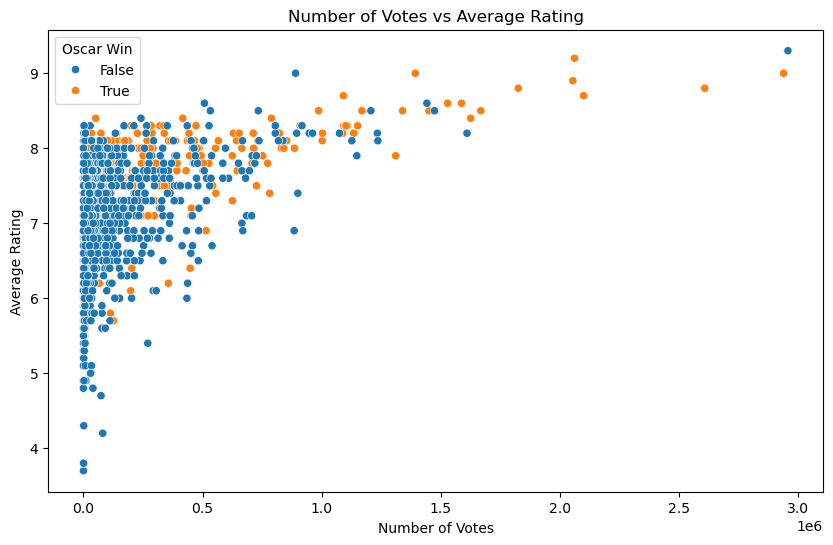

In [6]:
q1.plot_numvotes_vs_ratings()

The relation between the number of votes and the average ratings seems to be non-linear.  
Let's use a log scale to better visualize it.

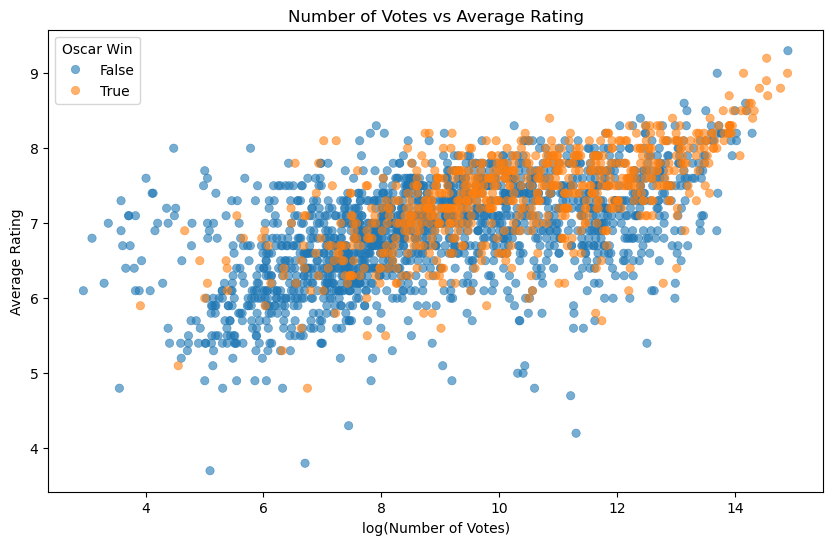

In [7]:
q1.plot_log_numvotes_vs_ratings()

We see that the number of votes and the ratings seems to be correlated in an non linear manner.  
Let's confirm this by computing the Spearman correlation. 

In [8]:
q1.print_spearman_corr_ratings_numVotes()

Spearman correlation between numVotes and averageRating:  0.5939721452138493


We notice a positive spearman correlation which aligns with our previous observations.  
Now, let's confirm the dependency between the average ratings and the log(number of votes) by performing a regression.

In [9]:
q1.print_reg_ratings_log_numVotes()

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     1283.
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          6.18e-225
Time:                        19:36:41   Log-Likelihood:                -2040.1
No. Observations:                2368   AIC:                             4084.
Df Residuals:                    2366   BIC:                             4096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.3107      0.049  

We notice a positive coefficient on the log(number of votes).  
Also, the coefficient is significant at a 1% level which means that the log(number of votes) has a significant impact on the ratings and we must take that into account when studying the impact of winning an oscar.

In order to get the best results, we need to take those factor into account when studying the effect of winning an oscar.  
To do so, we first try to perform a regression on the average ratings taking into account those factor.

In [10]:
q1.print_reg_ratings_all()

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     418.4
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          5.46e-218
Time:                        19:36:41   Log-Likelihood:                -1995.5
No. Observations:                2368   AIC:                             3999.
Df Residuals:                    2364   BIC:                             4022.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.9537    

From the regression, we notice that on average, winning an oscar will increase the rating of a movie by 0.21 units.

But all oscar categories are not worth the same, indeed winning an oscar for best actor or best picture are likely to have a significantly different impact of the ratings.  
So, let's study the causal effect on ratings of winning an oscar for each category.  

To do so we build a graph between oscar nominees (control group) and oscar winners (treated group).  
We add an edge between tow movies if they have been released the same year (this allows to control for the effect of release on the ratings).  
Also, we weight each edge by the number of votes difference. And then we create our matching by minimizing the weights. This allows to minimize the influence of the number of votes in our analysis.

However, we must also take into account the fact that a movie might have won an oscar in a category by nominated in another one. Thus, to avoid a bias, we must remove the nominees entries for such movies.

Also, because we study the causal effect of winning an oscar in a single category, we must remove movies that won multiple oscars.

Finally, we filter out categories for which we cannot create enough pairs.

With those conditions, we are able to compute the causal effect of winning an oscar for the following categories.

In [11]:
q1.print_causal_effect_for_base_cat()

Causal effect for category special effects: 0.5333333333333333
Causal effect for category actress in a leading role: 0.4055555555555554
Causal effect for category actor in a supporting role: 0.33749999999999997
Causal effect for category costume design: 0.3230769230769231
Causal effect for category sound recording: 0.30909090909090897
Causal effect for category music (song): 0.2823529411764706
Causal effect for category foreign language film: 0.2727272727272728
Causal effect for category documentary (feature): 0.2600000000000002
Causal effect for category music (scoring of a musical picture): 0.2333333333333333
Causal effect for category actress in a supporting role: 0.1571428571428571
Causal effect for category actor: 0.13076923076923092
Causal effect for category actress: -0.055555555555555504
Causal effect for category music (original song): -0.07333333333333349


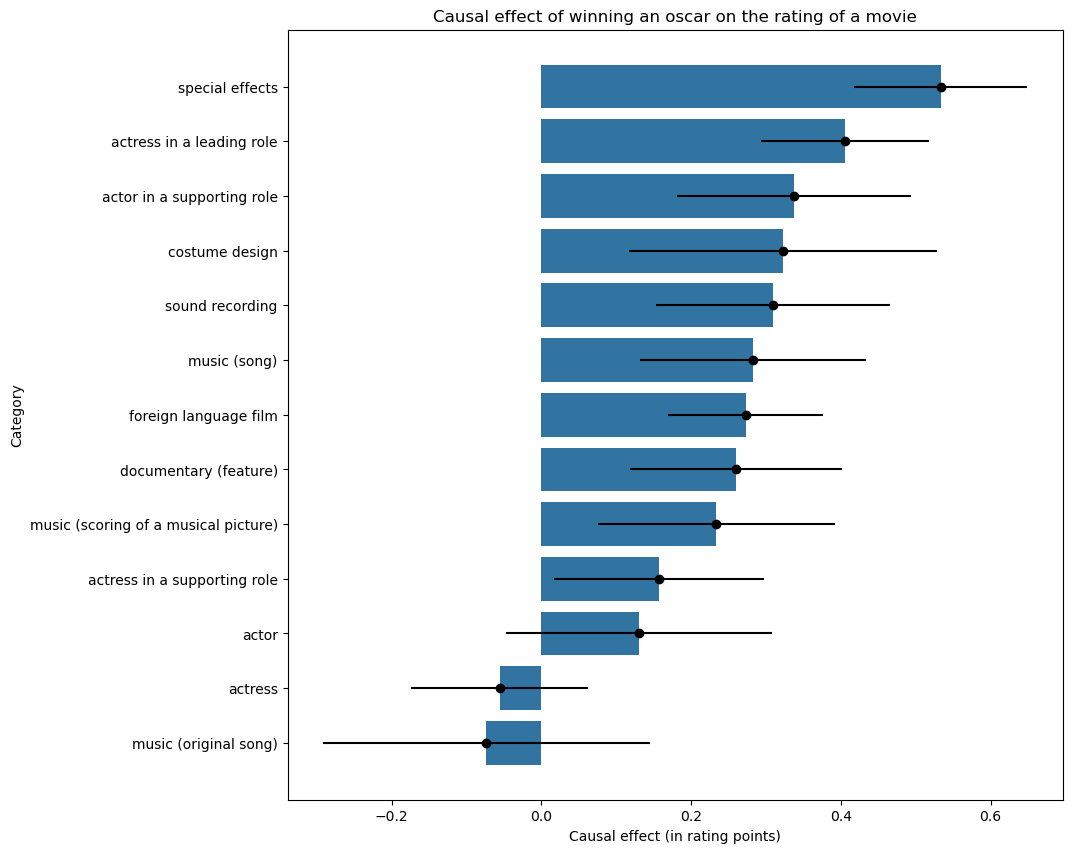

In [12]:
q1.plot_causal_effect_of_base_cat()


Using this approach, we are able to determine the causal effects of only a few categories due to the restrictions of our pipeline.  
We for instance notice the important impact of winning an oscar in special effect which on average increases ratings by 0.53 units.

However, there are still many categories for which we weren't able to get the effect.  
Indeed, let's check all the categories for which we have more than 10 entries.


In [13]:
q1.print_oscar_categories(min_samples = 10)

Category: actor in a supporting role, Number of samples: 319
Category: directing, Number of samples: 316
Category: actress in a supporting role, Number of samples: 315
Category: film editing, Number of samples: 308
Category: best picture, Number of samples: 284
Category: art direction, Number of samples: 223
Category: cinematography, Number of samples: 210
Category: actress, Number of samples: 191
Category: actor, Number of samples: 188
Category: sound, Number of samples: 178
Category: costume design, Number of samples: 170
Category: music (original score), Number of samples: 165
Category: music (song), Number of samples: 160
Category: sound recording, Number of samples: 160
Category: actress in a leading role, Number of samples: 150
Category: music (original song), Number of samples: 145
Category: actor in a leading role, Number of samples: 140
Category: cinematography (black-and-white), Number of samples: 133
Category: documentary (feature), Number of samples: 133
Category: foreign l

We see that many categories are related to the same area, thus we will define broader categories and perform the appropriate mapping.  
We'll now use the following categories:
- acting
- directing and production
- writing
- cinematography
- art direction
- sound
- music
- edting and effects
- costume

In [14]:
q1.print_causal_effect_for_new_cat()

Causal effect for category sound: 0.4523809523809521
Causal effect for category cinematography: 0.41904761904761906
Causal effect for category costume: 0.359090909090909
Causal effect for category writing: 0.13720930232558137
Causal effect for category directing and production: 0.09999999999999994
Causal effect for category acting: 0.07863247863247863
Causal effect for category editing and effects: 0.07142857142857142
Causal effect for category art direction: 0.06428571428571443
Causal effect for category music: 0.04025974025974029


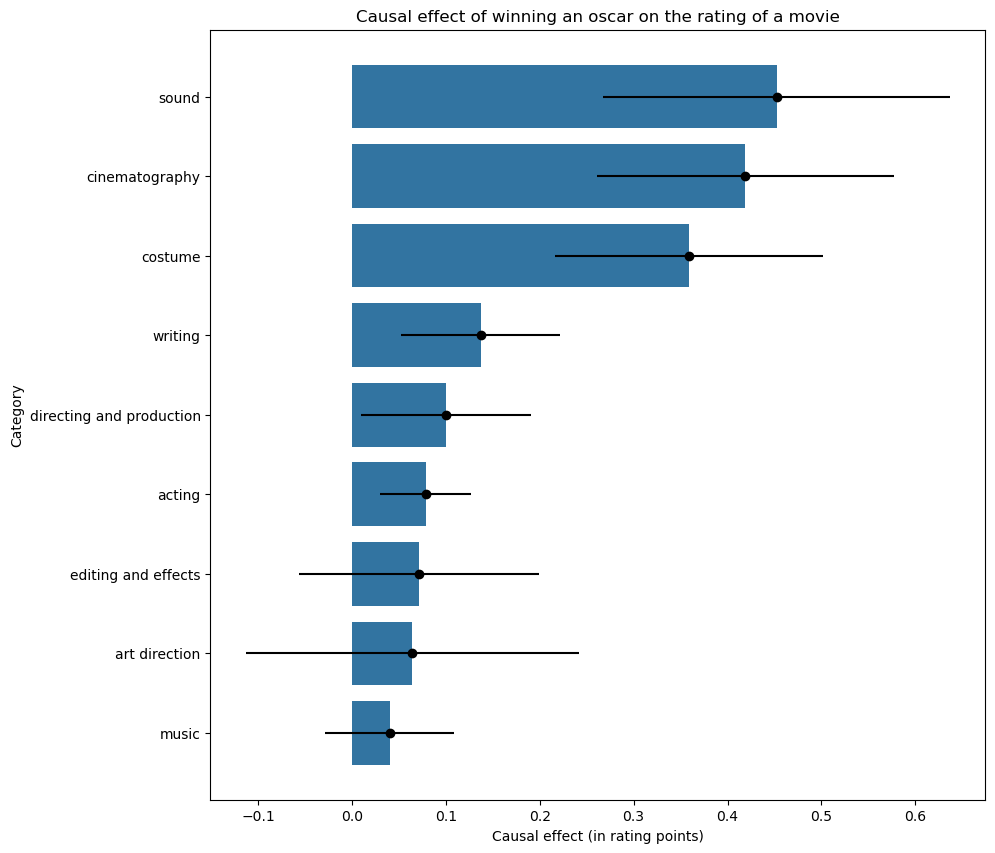

In [15]:
q1.plot_causal_effect_of_new_cat()

We notice that the most influent categories are the one related to the sound, cinematography and costumes.